![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

RESIDENCIAS PARA LA TERCERA EDAD: NECESIDAD Y NEGOCIO

### TEMA

El tema se centra en los adultos mayores (de 65 años en adelante) y parte de dos contataciones: la población total en esas edades está en pleno aumento por varios factores (avances médicos, avances sociales, mejora en la alimentación y condiciones de vida, entre otros) y hay cada vez más personas que sufren la soledad, a punto tal que es considerada como una de las epidemias actuales. 
A partir de ese contexto, se intentará analizar esta dinámica social y demográfica en relación a las residencias de aultos mayores.

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Puede que tengas más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

Hipótisis principal: hay una mayor necesidad de contruir nuevas residencias mayores, y estas son una buena posibilidad de negocio   

Hipótesis secundarias:
- No es la forma de vivienda más deseada, pero viene a cubrir una necesaidad, sobre todo más allá de los 75 años.
- Los adultos mayores necesitan una alternativa intermedia entre vivir solos o vivir en una residencia.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una breve descripción del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

Datos de población y demográficos:

Naciones Unidas:
https://population.un.org/wpp/

Wittgenstein Centre:
http://dataexplorer.wittgensteincentre.org/wcde-v2/

Ayto. de Valencia:
https://valencia.opendatasoft.com/explore/dataset/censo_vlc_1998-2022/table/?disjunctive.ano&disjunctive.censo

INE:
https://ine.es/jaxiT3/Tabla.htm?t=2903&L=0

Envejecimiento en Red ONG:
https://envejecimientoenred.csic.es/envejecimiento-poblacion-espana-siglo-xx-censos/

Datos de residencias de mayores:

ONG Edad vida:
https://www.edad-vida.org/fondo-documental/?categorias=vivienda

INE:
https://ine.es/jaxi/Tabla.htm?path=/t20/p274/serie/prov/p02/l0/&file=02014.px&L=0

Fundación MAPFRE:
https://ageingnomics.fundacionmapfre.org/


Datos sobre pensiones:

https://www.epdata.es/datos/pensiones-comunidad-autonoma-graficos-datos/34/comunidad-valenciana/299


Muestra mediante un head() los principales datasets con los que vas a trabajar

In [47]:
import pandas as pd
import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

In [63]:
#Data frame que incluye las residencias de mayores de Valencia.

df_residencias = pd.read_csv("C:\\Users\\damia\\OneDrive\\Escritorio\\The Bridge\\Datasets\\Ayto Valencia\\majors-mayores.csv",sep=';')
df_residencias.head()

,OBJECTID,equipamien,x,y,identifica,codvia,numportal,telefono,geo_shape,geo_point_2d
0,21859,ASOCIACIÓN EMPRESARIAL DE RESIDENCIAS Y SERVIC...,721325.926000,4.375350e+06,1400,76320,2,963571710,"{""coordinates"": [-0.4260075931350785, 39.49929...","39.4992962065423, -0.4260075931350785"
1,21879,CENTRO MUNICIPAL DE ACTIVIDADES PARA PERSONAS ...,728157.266653,4.373151e+06,3465,81437,8,963621757,"{""coordinates"": [-0.3473914522932878, 39.47771...","39.477715336855084, -0.3473914522932878"
2,21888,CENTRO MUNICIPAL DE ACTIVIDADES PARA PERSONAS ...,724178.520000,4.371374e+06,7843,66480,S/N,962087908,"{""coordinates"": [-0.3942008703772036, 39.46277...","39.462773691705195, -0.3942008703772036"
3,21889,AULAS DE TERCERA EDAD,726704.262000,4.371813e+06,1438,12600,39,963334877,"{""coordinates"": [-0.36472212286315797, 39.4660...","39.46606088494316, -0.36472212286315797"
4,21890,CEAM DOCTOR WAKSMAN,726004.877000,4.370694e+06,3412,25260,20,963732711,"{""coordinates"": [-0.37322295534723715, 39.4561...","39.45617001991109, -0.37322295534723715"


In [64]:
df_residencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      155 non-null    int64  
 1   equipamien    155 non-null    object 
 2   x             149 non-null    float64
 3   y             149 non-null    float64
 4   identifica    155 non-null    int64  
 5   codvia        155 non-null    int64  
 6   numportal     154 non-null    object 
 7   telefono      155 non-null    int64  
 8   geo_shape     149 non-null    object 
 9   geo_point_2d  149 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 12.2+ KB


In [65]:
#Renombramos la columna "equipamien", que es la que tiene el nombre de las residencias.

df_residencias.rename(columns={'equipamien': 'residencias'}, inplace=True)

In [66]:
# elimina las filas con valores faltantes en la columna "geo_point_2d"
df_residencias = df_residencias.dropna(subset=['geo_point_2d']) # elimina las filas con valores faltantes en la columna "geo_point_2d"


In [67]:
df_residencias['coordenadas'] = df_residencias['geo_point_2d'].fillna('').apply(lambda x: x.split(','))
df_residencias['coordenadas'] = df_residencias['coordenadas'].apply(lambda x: [float(i) for i in x])

In [68]:
mapa = folium.Map(location=[39.4693, -0.3766], zoom_start=7)
for i, row in df_residencias.iterrows():
    folium.Marker(location=row['coordenadas'], popup=row['residencias']).add_to(mapa)

In [69]:
mapa

In [3]:
recursos_sociales_Mayores = pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\recursos-socials-dirigits-a-majors.csv", encoding='latin1', sep=';')
recursos_sociales_Mayores.head()

,ï»¿Geo Point,Geo Shape,descripcio,titularida,idnotes
0,"39.46518338086564, -0.38855806329711184","{""coordinates"": [-0.388558063297112, 39.465183...",FUNDACION DE XIQUET A MAJOR COMUNITAT VALENCIANA,FUNDACION DE XIQUET A MAJOR COMUNITAT VALENCIANA,236C95A868DD20C5C1257E9A00377983
1,"39.47048574851439, -0.3795087424394815","{""coordinates"": [-0.379508742439482, 39.470485...",INICIATIVA SOCIAL INTEGRAL PER AL BENESTAR S.L.U,NaN,09CB8C953B418FE4C125784E004447D1
2,"39.460487846395175, -0.3858303449894974","{""coordinates"": [-0.385830344989497, 39.460487...",CENTRO MUNICIPAL DE ACTIVIDADES PARA PERSONAS ...,Ayuntamiento de Valencia. ConcejalÃ­a de Biene...,F4D2C3C100CA4F77C12572D6002D2EFA
3,"39.488043971015045, -0.3782722727586427","{""coordinates"": [-0.378272272758643, 39.488043...",CENTRO MUNICIPAL DE ACTIVIDADES PARA PERSONAS ...,Ayuntamiento de Valencia. ConcejalÃ­a de Biene...,E786EB8EE444206FC12572D6002D2EFF
4,"39.47173967461121, -0.3572718424751453","{""coordinates"": [-0.357271842475145, 39.471739...",ATENZIA. SERVICIOS DE TELEASISTENCIA,NaN,BD1DC38AC9FF4D94C1257BE50039E700


In [5]:
poblacion_mundial = pd.read_excel(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\world_population2023.xlsx")
poblacion_mundial.head()

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [6]:
esperanza_de_vida_vlc= pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\esperanca-de-vida-a-la-ciutat-de-valencia.csv", encoding='latin1', sep=';')
esperanza_de_vida_vlc.sort_values(by="ï»¿Year").head()

,ï»¿Year,Sexo,GeoCode,Value
324,2009,NaN,d174,82.13
23,2009,NaN,d2,82.19
134,2009,NaN,d3,82.19
124,2009,NaN,d1,80.02
234,2009,Mujeres,NaN,84.30


In [7]:
suicidios_vlc= pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\oe_29_muertes_suicidio.csv", sep=';')
suicidios_vlc.head()

,Id,Año,Sexo,Edad,Valor,Fecha creacion,Fecha baja
0,2,2009,Hombres,Todos,8.93,2023-07-02,NaN
1,3,2009,Mujeres,Todos,3.56,2023-07-02,NaN
2,9,2010,Mujeres,Todos,4.54,2023-07-02,NaN
3,11,2010,Ambos,30 a 69,12.00,2023-07-02,NaN
4,15,2011,Mujeres,Todos,4.33,2023-07-02,NaN


In [11]:
df_todos = suicidios_vlc.loc[suicidios_vlc['Edad'] == 'Todos']
df_30_69 = suicidios_vlc.loc[suicidios_vlc['Edad'] == '30 a 69']
df_menor_30 = suicidios_vlc.loc[suicidios_vlc['Edad'] == '<30']
df_mayor_70 = suicidios_vlc.loc[suicidios_vlc['Edad'] == '>=70']

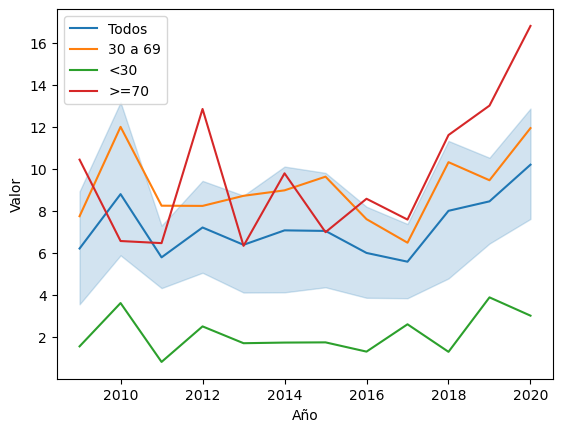

In [13]:
#Este gráfico claramente tiene que ir acompañado de otro que indique la cantidad de poblacion que hay por grupo de edad
#El error será que dice "todos"?
import seaborn as sns

sns.lineplot(x='Año', y='Valor', data=df_todos, label='Todos')
sns.lineplot(x='Año', y='Valor', data=df_30_69, label='30 a 69')
sns.lineplot(x='Año', y='Valor', data=df_menor_30, label='<30')
sns.lineplot(x='Año', y='Valor', data=df_mayor_70, label='>=70')

plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.show()

<Axes: xlabel='Año', ylabel='Valor'>

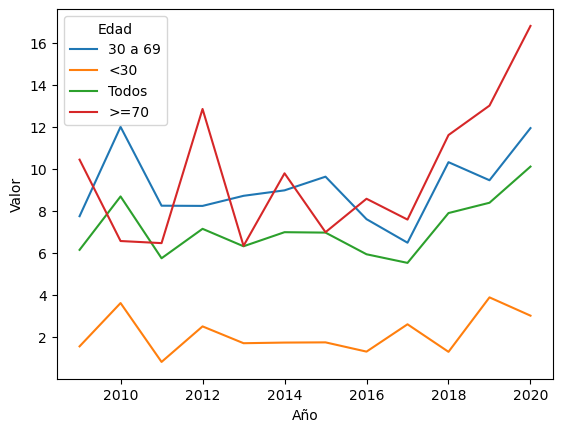

In [14]:
import seaborn as sns

# Filtrar los datos
filtro_edad = suicidios_vlc["Edad"].isin(["Todos", "30 a 69", "<30", ">=70"])
filtro_sexo = suicidios_vlc["Sexo"] == "Ambos"
suicidios_filtrados = suicidios_vlc[filtro_edad & filtro_sexo]

# Crear el gráfico
sns.lineplot(x="Año", y="Valor", hue="Edad", data=suicidios_filtrados)

In [42]:
pensiones= pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\la_jubilacion_se_lleva_gran_parte_del_gasto_total_en_pensiones.csv", sep=';')
pensiones.tail(60)

,Año,Periodo,Gasto total en pensiones,Jubilación,Viudedad,Incapacidad permanente,Orfandad,Favor familiar
119,2023,Febrero,"11.921,94","8.675,12","1.994,44","1.058,81","162,39","31,18"
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,"Métrica:""Gasto total en pensiones""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,"Fuente:""Ministerio de Empleo y Seguridad Social""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,"Clasificación:""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,"Unidad:""Euros""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,"Escala:""Millones""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,"EscalaFactorPotencia10:""6""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,"SonDatosNumericos:""True""",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Eliminamos el valor 102 del dataframe, que corresponde a septiembre de 2021 y además las últimos valores eran descriptivos,
#por lo cual se elimina el final.

pensiones = pensiones.drop([102] + list(pensiones.index[120:]))


In [ ]:
pensiones.tail(40)

In [16]:
evolucion_pensiones= pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\evolucion_del_numero_de_pensiones_en_españa_.csv", sep=';')
evolucion_pensiones = evolucion_pensiones.iloc[:24]



In [17]:
evolucion_pensiones

,Año,Periodo,Número de pensiones
0,2021,Marzo,"9.815,73"
1,2021,Abril,"9.825,55"
2,2021,Mayo,"9.836,12"
3,2021,Junio,"9.854,69"
4,2021,Julio,"9.868,15"
5,2021,Agosto,"9.862,33"
6,2021,Septiembre,"9.871,64"
7,2021,Octubre,"9.881,21"
8,2021,Noviembre,"9.899,2"
9,2021,Diciembre,"9.916,97"


In [18]:

for index, row in evolucion_pensiones.iterrows():    
    evolucion_pensiones.at[index, "Número de pensiones"] = str(row["Número de pensiones"]).replace(".","").split(",")[0]

In [19]:

evolucion_pensiones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  24 non-null     object
 1   Periodo              24 non-null     object
 2   Número de pensiones  24 non-null     object
dtypes: object(3)
memory usage: 708.0+ bytes


In [23]:
evolucion_pensiones.head(24)

,Año,Periodo,Número de pensiones
0,2021,Marzo,9815
1,2021,Abril,9825
2,2021,Mayo,9836
3,2021,Junio,9854
4,2021,Julio,9868
5,2021,Agosto,9862
6,2021,Septiembre,9871
7,2021,Octubre,9881
8,2021,Noviembre,9899
9,2021,Diciembre,9916


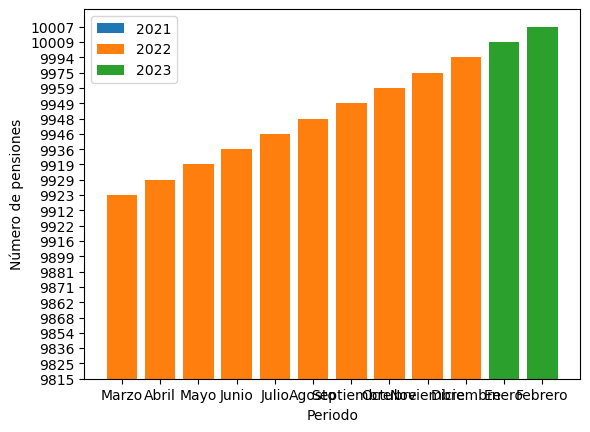

In [21]:
#¿Por qué no me muestra todos los meses?

import matplotlib.pyplot as plt

for year in evolucion_pensiones['Año'].unique():
    df = evolucion_pensiones[evolucion_pensiones['Año'] == year]
    plt.bar(df['Periodo'], df['Número de pensiones'], label=year)

plt.xlabel('Periodo')
plt.ylabel('Número de pensiones')
plt.legend()
plt.show()

In [11]:
evolucion_pensionistas= pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\evolucion_del_numero_de_pensionistas_en_comunidad_valenciana.csv", sep=';')
evolucion_pensionistas.head()

,Año,Periodo,Hombres,Mujeres
0,2005,Enero,367.009,354.329
1,2005,Febrero,366.536,353.813
2,2005,Marzo,366.987,354.683
3,2005,Abril,367.256,354.933
4,2005,Mayo,368.315,356.000


In [15]:
manzanas_poblacion = pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\illes-amb-dades-de-poblacio-manzanas-con-datos-de-poblacion.csv", sep=';')
manzanas_poblacion.columns

Index(['Ref. manzana', 'GID', 'gis.gis.MANZANAS.area', 'HOJA', 'COORX',
       'COORY', 'LINKID', 'GLOBALID', 'geo_shape', 'geo_point_2d'],
      dtype='object')

In [20]:
envejecimiento_CV = pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\envejecimiento_de_la_poblacion_en_comunidad_valenciana.csv", sep=';')
envejecimiento_CV.head()

,Año,Periodo,De 0 a 4 años,De 85 a 89 años
0,2003,Semestre 1,212.486,43.774
1,2003,Semestre 2,217.760,44.181
2,2004,Semestre 1,224.111,44.827
3,2004,Semestre 2,228.163,45.482
4,2005,Semestre 1,234.534,46.331


In [21]:
envejecimiento_previsto_CV = pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\envejecimiento_de_la_poblacion_previsto_en_comunidad_valenciana.csv", sep=';')
envejecimiento_previsto_CV.head()

,Año,Periodo,1 año,90 años
0,2017,Año,43.662,10.978
1,2018,Año,42.174,10.783
2,2019,Año,40.929,11.684
3,2020,Año,39.738,11.955
4,2021,Año,38.636,13.006


In [4]:
map_geojson = folium.Map(location=[39.77, -86.15], zoom_start=7)

# add geojson file to map
folium.GeoJson(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\majors-mayores.geojson.txt", name='geojson indiana').add_to(map_geojson)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

In [9]:
demografia = pd.read_csv(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Repo GitHub\repo-dsftf23\2-Data_Analysis\Entregas\EDA\Demographic.csv", encoding='latin1', sep=',')
demografia.columns

Index(['ï»¿"Row"', 'FIPS', 'GENC', 'Country/Area Name', 'Year', 'Population',
       'Annual Growth Rate %', 'Area (sq km)', 'Density (per sq km)',
       'Total Fertility Rate', 'Life Expectancy at Birth',
       'Under-5 Mortality Rate'],
      dtype='object')

In [28]:
demografia[demografia["Country/Area Name"] == "Japan"].head(5)

,"ï»¿""Row""",FIPS,GENC,Country/Area Name,Year,Population,Annual Growth Rate %,Area (sq km),Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate
15251,15252,JA,JP,Japan,1950,83805000,NaN,364485,229.9,NaN,NaN,NaN
15252,15253,JA,JP,Japan,1951,85163848,NaN,364485,233.7,NaN,NaN,NaN
15253,15254,JA,JP,Japan,1952,86459025,NaN,364485,237.2,NaN,NaN,NaN
15254,15255,JA,JP,Japan,1953,87655163,NaN,364485,240.5,NaN,NaN,NaN
15255,15256,JA,JP,Japan,1954,88753892,NaN,364485,243.5,NaN,NaN,NaN


In [13]:
map_geojson = folium.Map(location=[39.4693, -0.3766], zoom_start=7)

# add geojson file to map
folium.GeoJson(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\recursos-socials-dirigits-a-majors.geojson", name='recursos sociales para mayores', style_function=lambda x: {'color':'blue'}).add_to(map_geojson)

folium.GeoJson(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\majors-mayores.geojson", name='Instituciones mayores', style_function=lambda x: {'color':'red'}).add_to(map_geojson)
# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

In [1]:
import folium
import json

with open(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\recursos-socials-dirigits-a-majors.geojson") as f:
    recursos_sociales = json.load(f)

with open(r"C:\Users\damia\OneDrive\Escritorio\The Bridge\Datasets\Ayto Valencia\majors-mayores.geojson") as f:
    instituciones_mayores = json.load(f)

map_geojson = folium.Map(location=[39.4693, -0.3766], zoom_start=12)

folium.GeoJson(data=recursos_sociales, 
               name='recursos sociales para mayores', 
               tooltip=folium.GeoJsonTooltip(fields=['titularida'])).add_to(map_geojson)

folium.GeoJson(data=instituciones_mayores, 
               name='Instituciones mayores', 
               style_function=lambda x: {'color':'red'}, 
               tooltip=folium.GeoJsonTooltip(fields=['titularida'])).add_to(map_geojson)

folium.LayerControl().add_to(map_geojson)

map_geojson

TypeError: 'NoneType' object is not subscriptable